In [7]:
# Importing Libraries

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Importing Data

In [9]:
# Data Understanding

In [3]:
df = pd.read_csv('Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
# Handling Null Values

In [11]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [14]:
# Check for Duplicate Values

In [12]:
df.duplicated().any()

False

In [15]:
# Seprating columns based on dtype

In [16]:
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

In [18]:
numerical_cols.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [19]:
categorical_cols.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [20]:
# Create a Copy of a dataframe and store it in a new dataframe

In [21]:
df1 = df.copy()

In [23]:
# Seprating Dependent Variable and Independent Variable

In [22]:
dependent_var = df['price']
independent_var = df[['area',
                      'bedrooms',
                      'bathrooms',
                      'stories',
                      'mainroad',
                      'guestroom',
                      'basement',
                      'hotwaterheating',
                      'airconditioning',
                      'parking',
                      'prefarea',
                      'furnishingstatus']]

In [25]:
# Iterate through categorical columns (excluding the last one) in the DataFrame 'df1'
for col in categorical_cols[:-1]:
    # Convert values to binary (1 for 'yes' and 0 for anything else) using a lambda function
    df1[col] = df1[col].apply(lambda x: 1 if x == 'yes' else 0)

In [26]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [27]:
# Removing Outliers

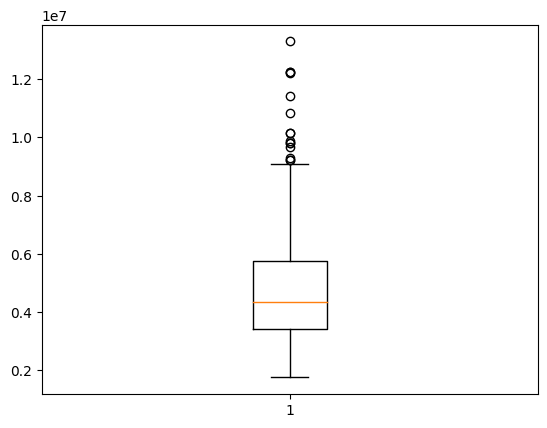

In [28]:
plt.boxplot(df1.price)
q1 = df1.price.quantile(0.25)
q3 = df1.price.quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
df1 = df1[ (df1.price >= lb) & (df1.price <= ub) ]

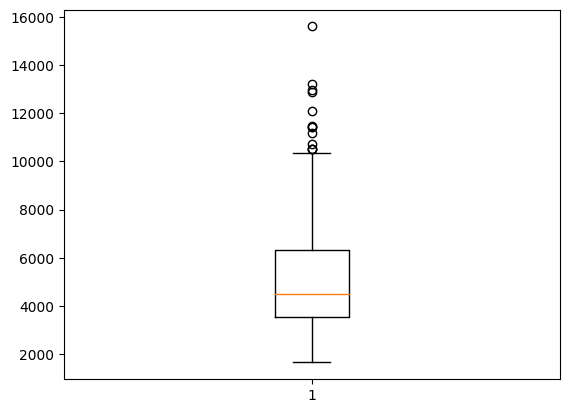

In [29]:
plt.boxplot(df1.area)
q1 = df1.area.quantile(0.25)
q3 = df1.area.quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
df1 = df1[ (df1.area >= lb) & (df1.area <= ub) ]

In [31]:
categorical_cols.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [32]:
 #       VISUALIZATION

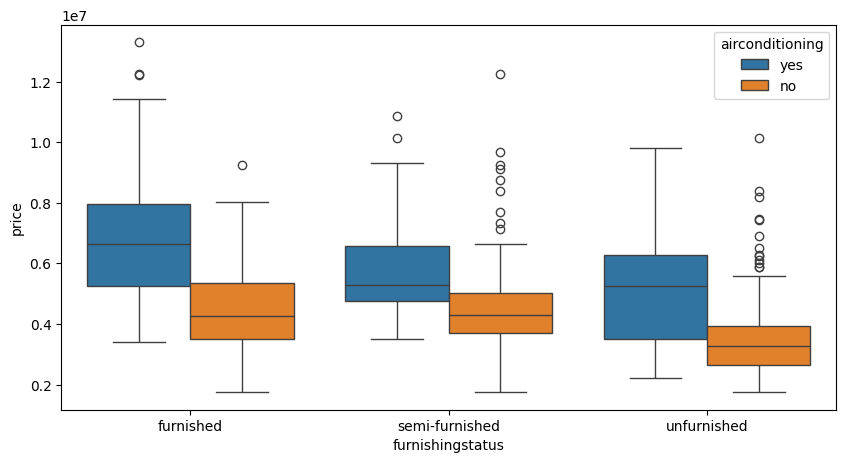

In [33]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

In [34]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             517 non-null    int64
 1   area              517 non-null    int64
 2   bedrooms          517 non-null    int64
 3   bathrooms         517 non-null    int64
 4   stories           517 non-null    int64
 5   mainroad          517 non-null    int64
 6   guestroom         517 non-null    int64
 7   basement          517 non-null    int64
 8   hotwaterheating   517 non-null    int64
 9   airconditioning   517 non-null    int64
 10  parking           517 non-null    int64
 11  prefarea          517 non-null    int64
 12  furnishingstatus  517 non-null    int64
dtypes: int64(13)
memory usage: 56.5 KB


In [36]:
# Distribution of Numerical columns

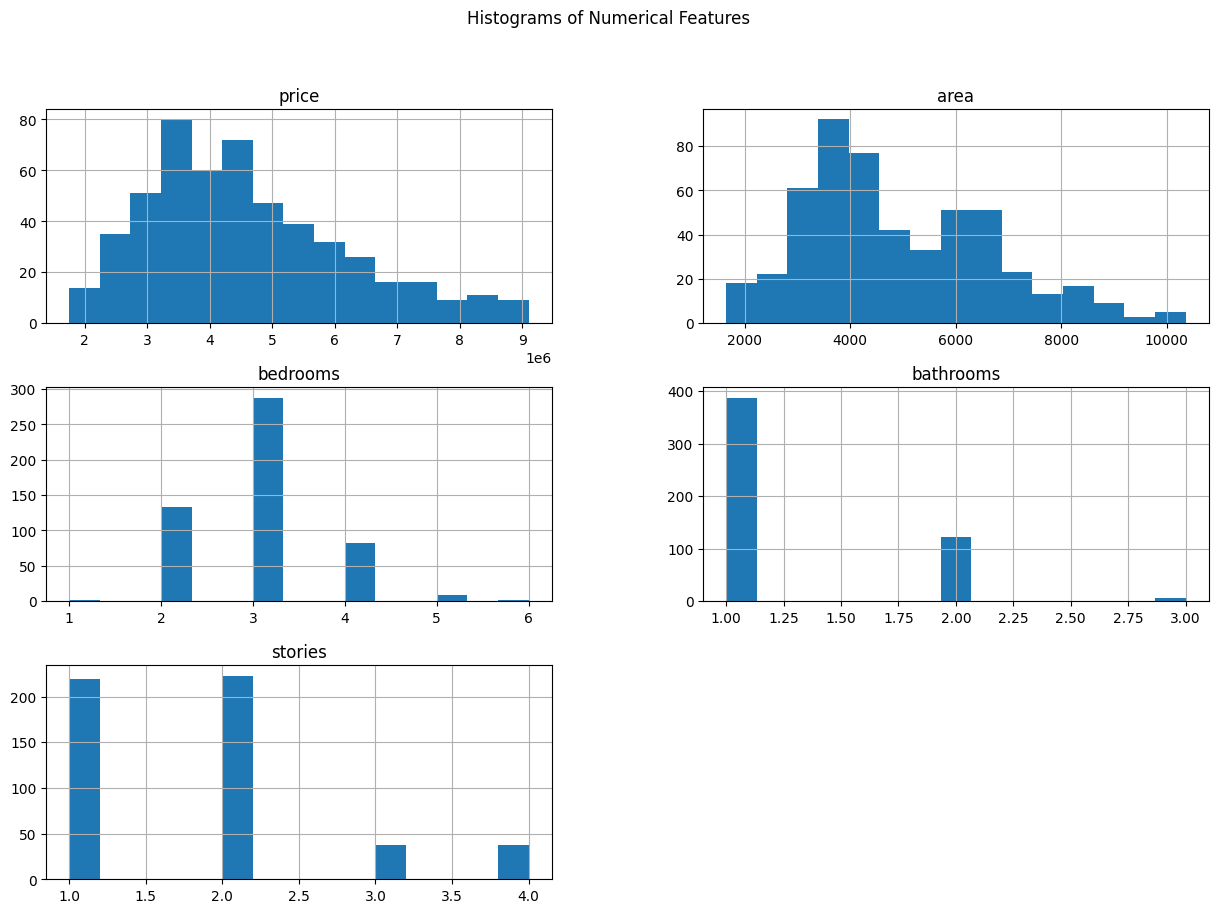

In [44]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

df1[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [41]:
# Box plots for numerical columns

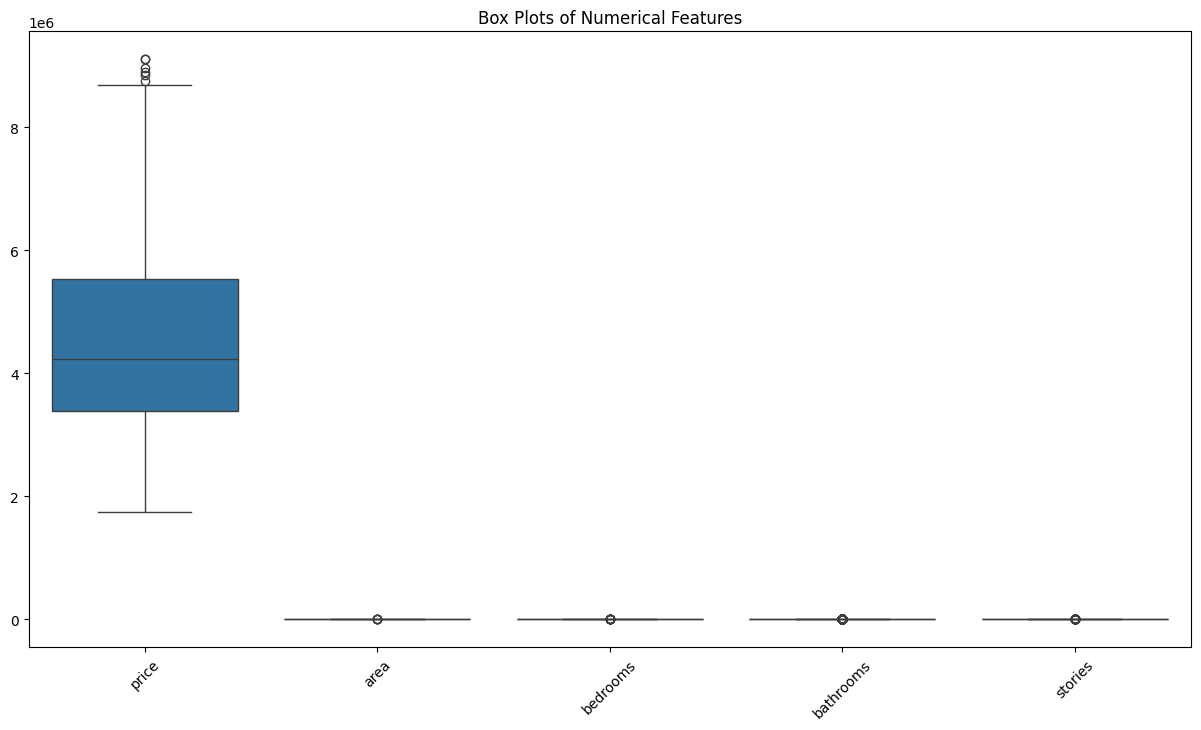

In [45]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_cols])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Count plots for categorical column

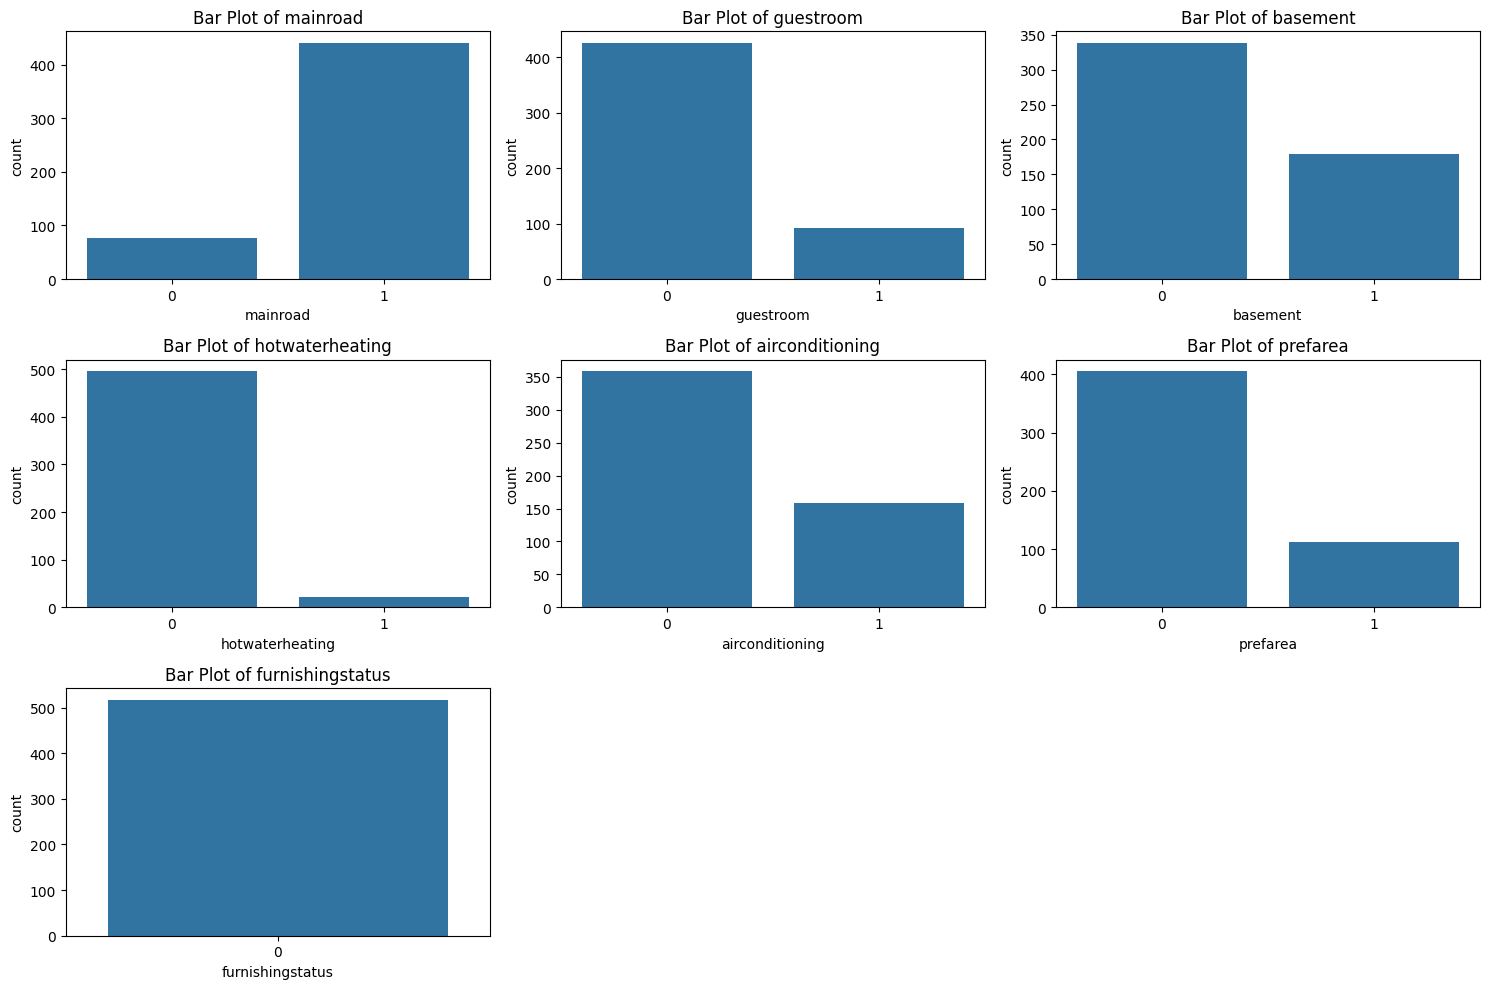

In [46]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df1)
    plt.title(f'Bar Plot of {col}')
    plt.tight_layout()
plt.show()

In [49]:
# Checking Correlation b/w variables

<Axes: >

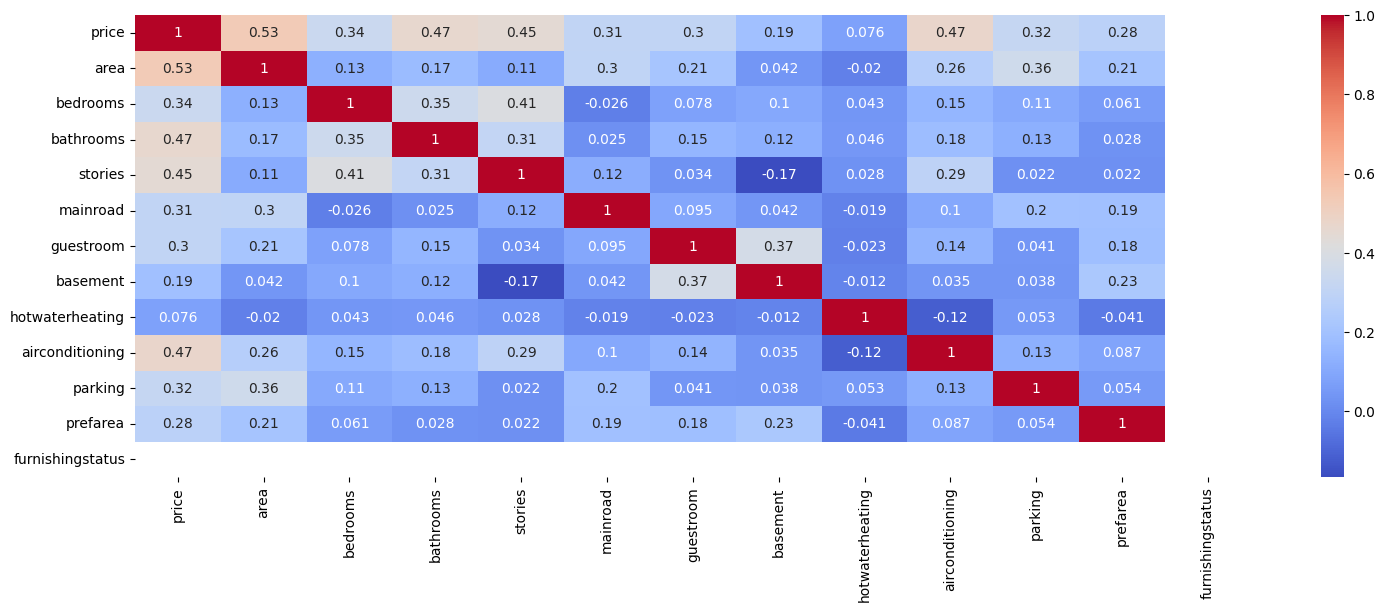

In [50]:
plt.figure(figsize=(18,6))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

In [51]:
# Feature Selection

In [56]:
X = df1.drop(['price'], axis=1).values# Independent Features
Y = df1['price'].values # Dependent Features

In [54]:
X

array([[6000,    4,    1, ...,    2,    0,    0],
       [6600,    4,    2, ...,    1,    1,    0],
       [8500,    3,    2, ...,    2,    0,    0],
       ...,
       [3620,    2,    1, ...,    0,    0,    0],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    0]])

In [57]:
Y

array([9100000, 9100000, 8960000, 8890000, 8855000, 8750000, 8680000,
       8645000, 8645000, 8575000, 8540000, 8463000, 8400000, 8400000,
       8400000, 8400000, 8400000, 8295000, 8190000, 8120000, 8080940,
       8043000, 7980000, 7962500, 7910000, 7875000, 7840000, 7700000,
       7700000, 7560000, 7560000, 7525000, 7490000, 7455000, 7420000,
       7420000, 7420000, 7350000, 7350000, 7350000, 7350000, 7245000,
       7210000, 7210000, 7140000, 7070000, 7070000, 7035000, 6930000,
       6895000, 6860000, 6790000, 6755000, 6720000, 6685000, 6650000,
       6650000, 6650000, 6650000, 6650000, 6650000, 6629000, 6615000,
       6580000, 6510000, 6510000, 6510000, 6475000, 6475000, 6440000,
       6440000, 6419000, 6405000, 6300000, 6300000, 6300000, 6300000,
       6300000, 6293000, 6265000, 6230000, 6230000, 6195000, 6195000,
       6195000, 6160000, 6160000, 6125000, 6107500, 6090000, 6090000,
       6090000, 6083000, 6083000, 6020000, 6020000, 6020000, 5950000,
       5950000, 5950

In [58]:
# Buliding Linear Model

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(413, 12)
(104, 12)
(413,)
(104,)


In [62]:
# Data Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Model Building

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
le = LinearRegression()
le_model = le.fit(X_train, Y_train)
le_model.score(X_train, Y_train)

0.6518513534990431

In [67]:
le_model.intercept_

1873520.774712251

In [68]:
le_model.coef_

array([2113201.34770731,  566460.43979371, 1429211.98692501,
       1399222.44150618,  418162.13862645,  432408.12042053,
        338418.64581052,  717953.42393598,  880232.47593661,
        698230.23290351,  508107.34553792,       0.        ])

In [71]:
Y_pred_linear = le_model.predict(X_test)

In [70]:
#Evaluation Matrics For Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [72]:
# Calculating the performance metrics.
MAE_linear = mean_absolute_error(Y_test,Y_pred_linear)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = mean_squared_error(Y_test,Y_pred_linear)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = np.sqrt(MSE_linear)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = r2_score(Y_test, Y_pred_linear)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = 1-(1-r2_score(Y_test,Y_pred_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 score : {Adjusted_R2_linear}")

Mean Absolute Error : 764798.0372632171
Mean squared Error : 1031069174338.3411
Root Mean squared Error : 1015415.7642750782
R2 score : 0.6485573332696896
Adjusted R2 score : 0.6022132453492091


In [73]:
# Linear Regression Plot Predication vs Actual

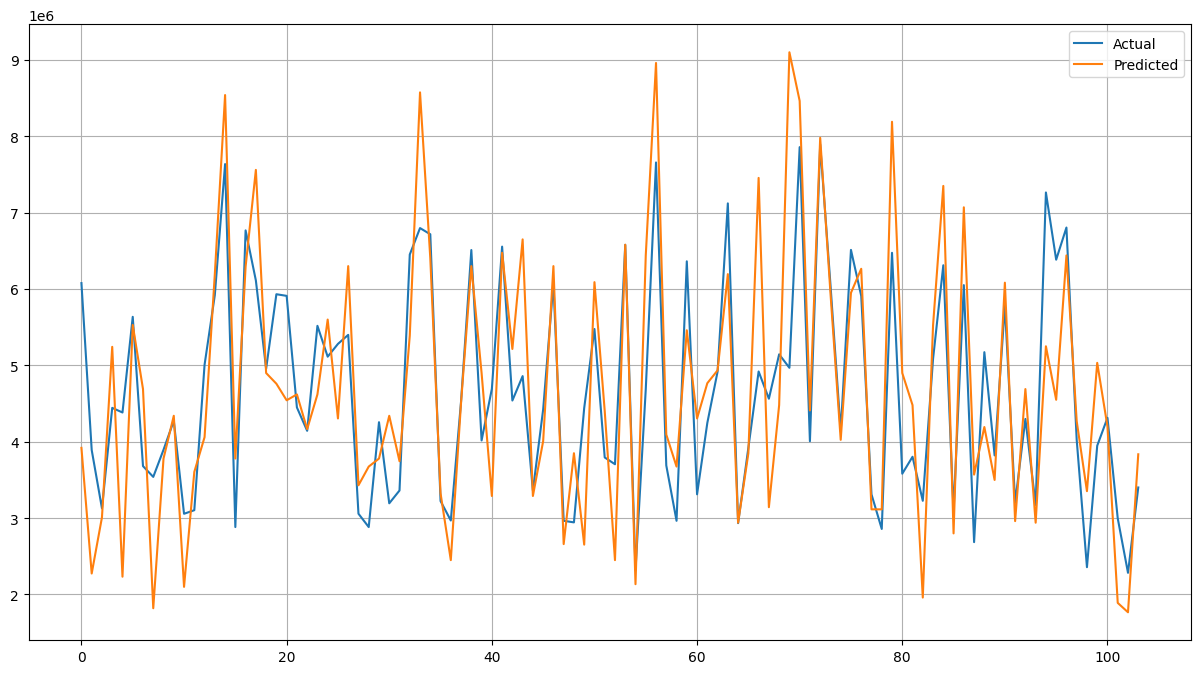

In [74]:
plt.figure(figsize=(15,8))
plt.plot(Y_pred_linear)
plt.plot(Y_test)
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [75]:
# Residual plot to check for homoscedasticity

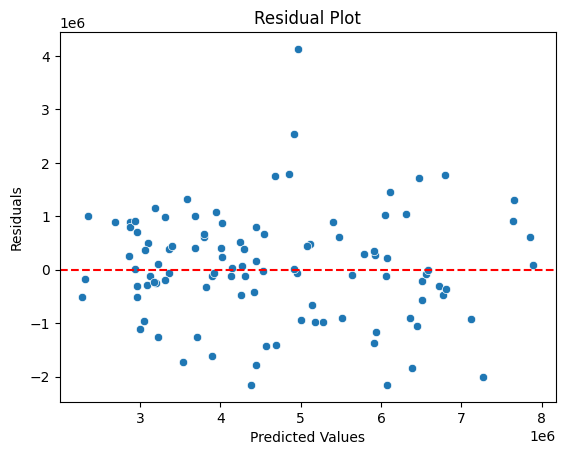

In [77]:
sns.scatterplot(x=Y_pred_linear, y=Y_test - Y_pred_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [78]:
          # THANKYOU